In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read_csv() 함수로 df 생성
df_auto = pd.read_csv('c:/sample_data/auto-mpg.csv', header=None)
# 열 이름을 저장
df_auto.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                 'acceleration', 'model year', 'origin', 'name']
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# 데이터 자료형 확인
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
# 출력 열의 자료형 변경 (문자열 -> 숫자)
df_auto['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
df_auto['horsepower'].replace('?', np.nan, inplace=True)   # '?'을 np.nan으로 변경
df_auto.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락 데이터 행 삭제
df_auto['horsepower'] = df_auto['horsepower'].astype('float')   # 문자열을 실수형으로 변환

In [9]:
df_auto['horsepower'].isnull().sum()

0

In [11]:
# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf =df_auto[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


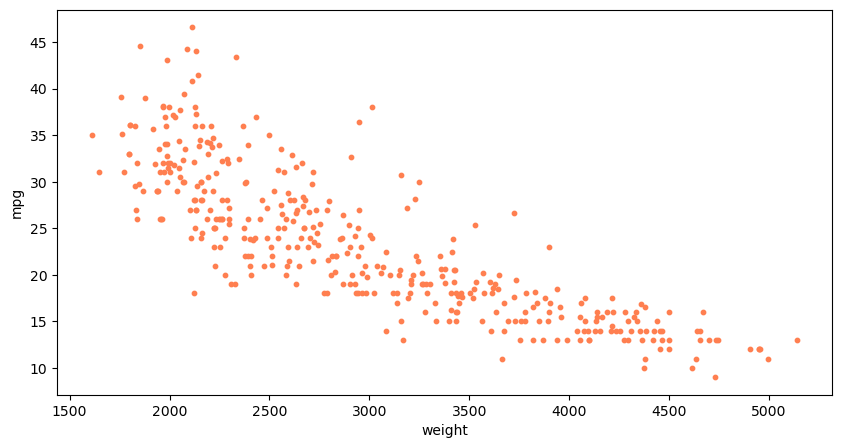

In [12]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

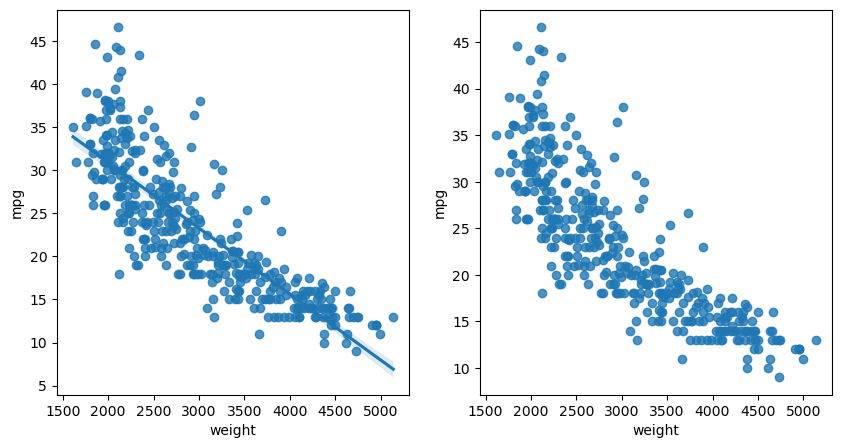

In [14]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)   # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)   # 회귀선 미표시
plt.show()
plt.close()

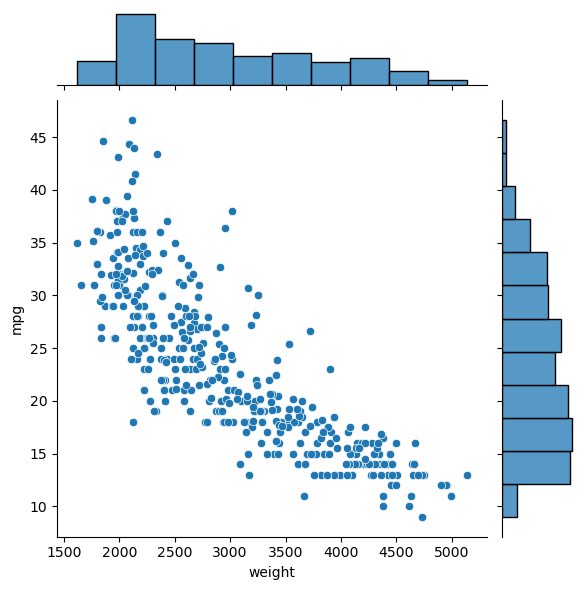

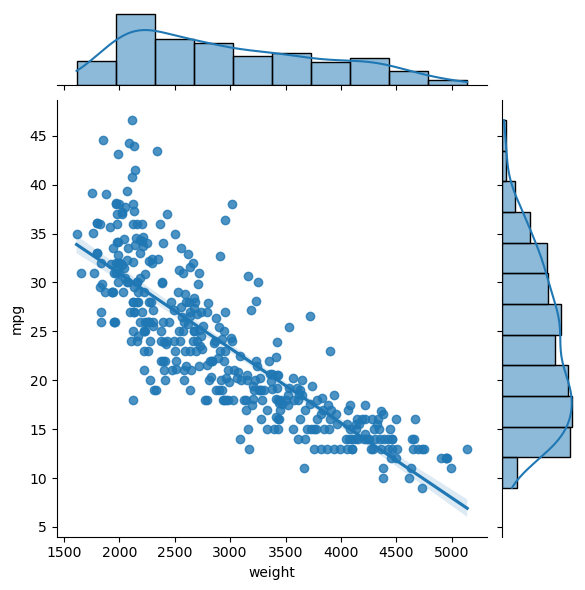

In [15]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)   # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)   # 회귀선 표시
plt.show()
plt.close()

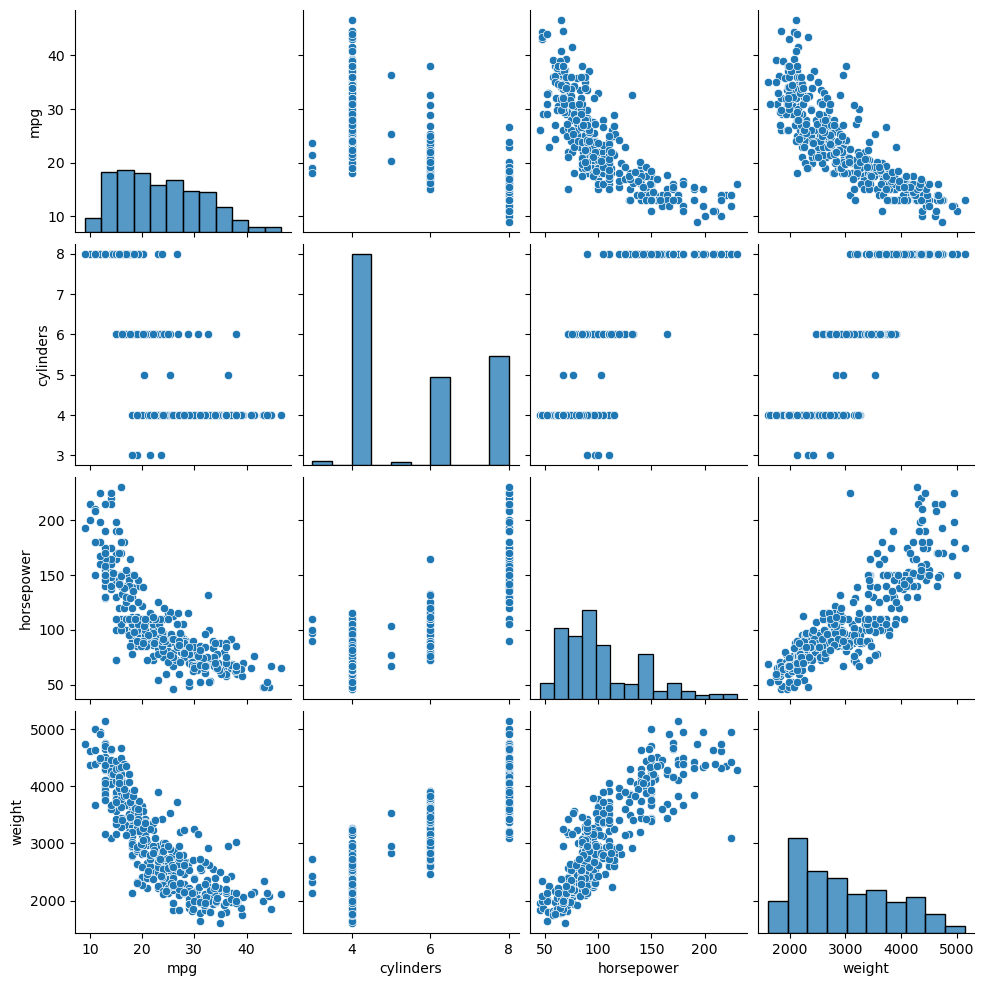

In [17]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()

In [20]:
# 속성(변수) 선택
X = ndf[['weight']]   # 독립변수 X
y = ndf['mpg']   # 종속변수 Y

In [21]:
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (392, 1)
y.shape: (392,)


In [23]:
# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,   # 독립변수
                                                    y,   # 종속변수
                                                    test_size=0.3,   # 검증 30%
                                                    random_state=10)   # 랜덤 추출 값
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (274, 1)
X_test shape:  (118, 1)


In [24]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# 학습을 마친 모형에 test_data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.6822458558299325

In [28]:
# 회귀식의 기울기 
print('기울기 a: ', lr.coef_)

기울기 a:  [-0.00775343]


In [30]:
# 회귀식의 y절편 
print('y절편 b: ', lr.intercept_)

y절편 b:  46.710366257280086


In [31]:
# 모형에 X_test 데이터 입력하여 예측한 값 y_hot을 실제 값 y와 비교 
y_hat = lr.predict(X_test)
y_hat

array([25.62103211, 27.13295129, 20.19362994, 33.06432652, 15.07636504,
       19.99979415, 16.70458569,  6.85772747, 28.6061033 , 29.04804891,
       20.8449182 , 20.10058876, 25.62103211, 26.66774539, 13.57219929,
       18.23976516, 24.19440068, 29.49774795, 12.78134926, 12.95192476,
       13.9908846 , 31.28103723, 22.37234424, 15.27020083, 18.0769431 ,
       10.78871732, 17.39464111, 30.15678964, 21.39541185, 26.17927919,
       21.64352166, 21.82185059, 26.35760812, 23.35703006, 22.90733103,
       30.62199554, 31.31980439, 21.73656284, 17.42565484, 25.94667624,
       21.81409716, 23.57412615, 30.27309111, 21.66678196, 22.28705649,
       10.60263496, 15.06085818, 32.17268187, 22.24828933, 29.7303509 ,
       29.14884352, 11.82767717, 23.28724918, 13.70400763, 17.54970974,
       24.72938747, 24.11686637, 29.73810433, 30.24207739, 25.62103211,
       31.04843428, 27.00114295, 19.37951962, 23.87650999, 26.04747085,
       32.9635319 ,  7.9664682 , 23.83774283, 21.35664469, 14.69

In [32]:
df_y = pd.DataFrame({'y_hat': y_hat, 'y': y_test})
df_y

,y_hat,y
243,25.621032,21.5
371,27.132951,29.0
300,20.193630,23.9
345,33.064327,35.1
265,15.076365,17.5
...,...,...
384,31.474873,32.0
20,25.993197,25.0
189,15.991270,15.5
60,28.040103,20.0


In [33]:
df_y['차이'] = df_y['y_hat']-df_y['y']
df_y

,y_hat,y,차이
243,25.621032,21.5,4.121032
371,27.132951,29.0,-1.867049
300,20.193630,23.9,-3.706370
345,33.064327,35.1,-2.035673
265,15.076365,17.5,-2.423635
...,...,...,...
384,31.474873,32.0,-0.525127
20,25.993197,25.0,0.993197
189,15.991270,15.5,0.491270
60,28.040103,20.0,8.040103


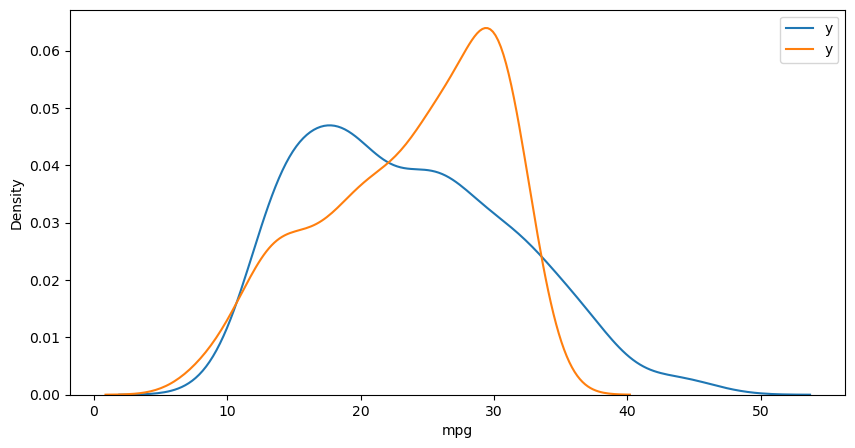

In [35]:
y_hat =lr.predict(X)

plt.figure(figsize=(10, 5))
# 커널 밀도 추정(KDE: kernael Density Estimator)
# 쉽게 이야기하면 히스토그램과 같은 결과를 곡선형태로 표현한거라 생각
# 자세하고 확실한 내용은 http://sungkee-book.tistory.com/2 참고
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y', ax=ax1)
plt.legend()
plt.show()

In [36]:
((df_y['y_hat'] - df_y['y']) ** 2).mean()

17.990178941054793

In [39]:
import numpy as np

np.random.rand(10, 1)

array([[0.22832135],
       [0.13359234],
       [0.53603583],
       [0.95945482],
       [0.01850394],
       [0.68494015],
       [0.67690081],
       [0.42493639],
       [0.80500376],
       [0.33414791]])

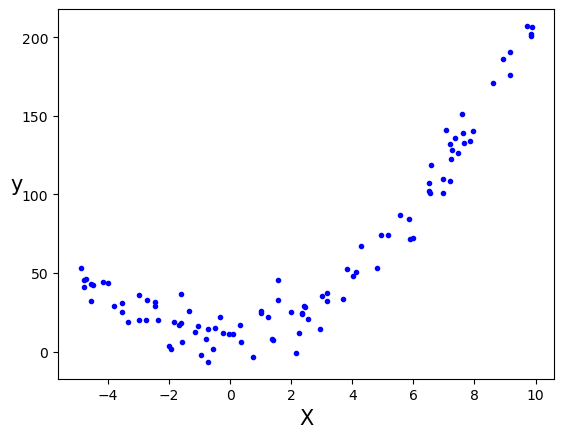

In [55]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
X = -5 + 15 * np.random.rand(n, 1)
noise = 10 * np.random.randn(n, 1)

y =2 * X ** 2 + 1 * X + 10 + noise   # 2차 방정식에 noise를 포함(ax^2 + bx + c + noise)

# print(f'X: {X}')
# print(f'noise: {noise}')
# print(f'y: {y}')
plt.plot(X, y, "b.")
plt.ylabel('y', fontsize=15, rotation=0)
plt.xlabel('X', fontsize=15)
plt.show()

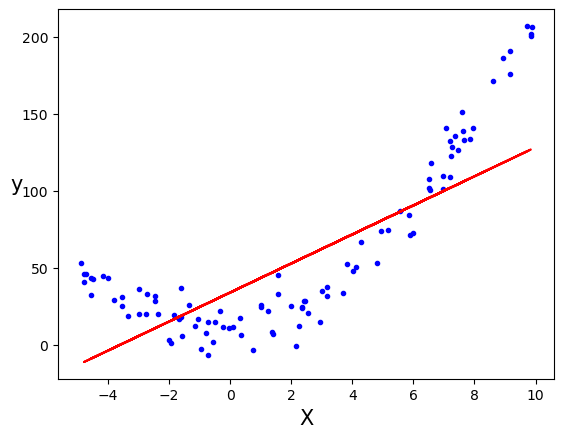

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

plt.plot(X, y, "b.")
plt.ylabel('y', fontsize=15, rotation=0)
plt.xlabel('X', fontsize=15)
plt.plot(X_test, pred, 'r')
plt.show()

In [58]:
# PolynamialFeatures 클래스를 이용해 피처를 다항식 피처로 변환
from sklearn.preprocessing import PolynomialFeatures

# degree = 2인 2차 다항식으로 X를 변환
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print('일차 단항식 계수 피처: ', X[0])
print('변환된 2차 다항식 계수 피처: ', X_poly[0])

일차 단항식 계수 피처:  [2.34897969]
변환된 2차 다항식 계수 피처:  [2.34897969 5.5177056 ]


In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([11.64815138]), array([[1.56381118, 1.89540958]]))

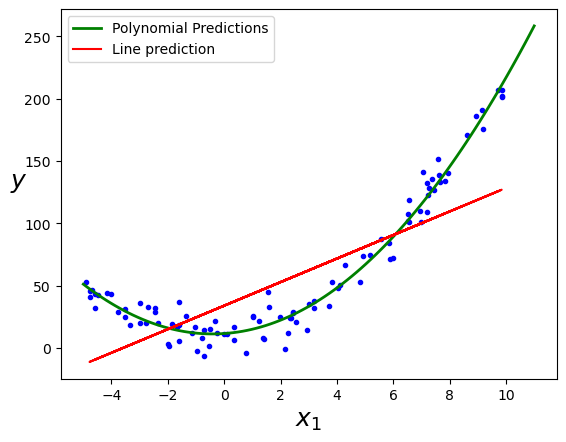

In [60]:
X_new = np.linspace(-5, 11, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'g', linewidth=2, label='Polynomial Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.plot(X_test, pred, 'r', label="Line prediction")
plt.legend()
plt.show()

In [62]:
# 속성(변수) 선택
X = ndf[['weight']]   # 독립변수 X
y = ndf['mpg']   # 종속변수 Y

# train data와 test data로 구분(7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X,   # 독립변수
                                                    y,   # 종속변수
                                                    test_size=0.3,   # 검증 30%
                                                    random_state=10)   # 랜덤 추출 값
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


In [63]:
# 다항식 변환
poly = PolynomialFeatures(degree=2)   # 2차항 적용
X_train_poly = poly.fit_transform(X_train)   # X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [64]:
# train data를 가지고 모형 학습 
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)   # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975481


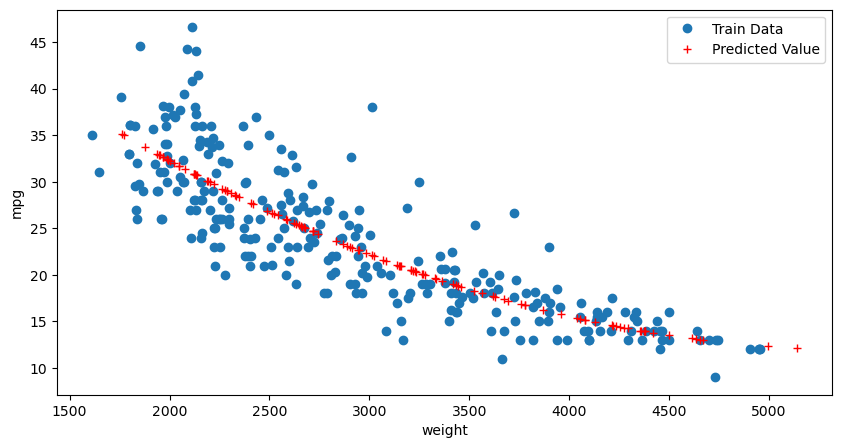

In [65]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')   # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')   # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

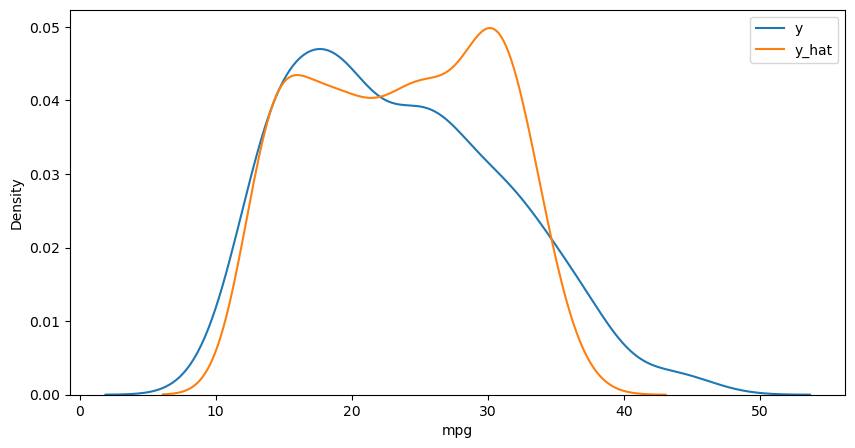

In [71]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [75]:
# CSV 파일을 데이터 프레임으로 변환
df = pd.read_csv('c:/sample_data./auto-mpg.csv', header=None)

# 열 이름을 저장
df_auto.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                 'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경 (문자열 -> 숫자)
df_auto['horsepower'].replace('?', np.nan, inplace=True)   # '?'을 np.nan으로 변경
df_auto.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락 데이터 행 삭제
df_auto['horsepower'] = df_auto['horsepower'].astype('float')   # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf =df_auto[['mpg', 'cylinders', 'horsepower', 'weight']]

# 속성(변수) 선택
X = ndf[['cylinders', 'horsepower', 'weight']]   # 독립변수 X1, X2, X3
y = ndf['mpg']   # 종속변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [76]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기 
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test_data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀선의 기울기
print('X 변수의 계수 a: ', lr.coef_)
print('\n')

# 회귀선의 y절편
print('상수항 b', lr.intercept_)

0.6939048496695598


X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.414351269634025


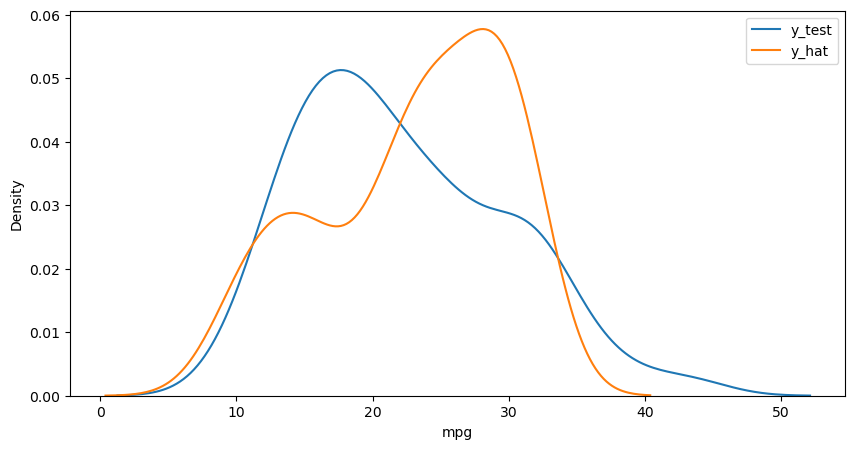

In [77]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1) 
plt.legend()
plt.show()